**SENTIMENT ANALYSIS ON AMAZON ELECTRONIC PRODUCTS**

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

In [2]:
# Specify the path to your CSV file
csv_file_path = "Amazon Reviews 1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

/var/folders/k9/89sz9rmn25s78pr1yz7ytdz40000gn/T/ipykernel_18742/3612977657.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [3]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
print( f'Shape of the dataset: ', df.shape )

Shape of the dataset:  (34660, 21)


In [5]:
#Now, let's see what are the columns in our database:

print ( f'Number of features in our dataset: ', len( df.columns ) )
print( '\n' )

for column in df.columns:
    print( column )

Number of features in our dataset:  21


id
name
asins
brand
categories
keys
manufacturer
reviews.date
reviews.dateAdded
reviews.dateSeen
reviews.didPurchase
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.sourceURLs
reviews.text
reviews.title
reviews.userCity
reviews.userProvince
reviews.username


!Here we are planning on describing each feature like in the Titanic lab, but we are waiting for the Kaggle link in case there is already a description which would make it easier!

In [6]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [7]:
amazon_categorical = []
amazon_numerical = []

for column in df.columns:
    if df[column].dtype == 'object':
        amazon_categorical.append(column )
    else:
        amazon_numerical.append(column )  
        
print( f'Number of categorical features: ', len(amazon_categorical) )
print ( '\n' )
        
print ( amazon_categorical )

Number of categorical features:  16


['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username']


In [8]:
print( f'Number of numerical features: ', len(amazon_numerical) )
print ( '\n' )

print ( amazon_numerical )

Number of numerical features:  5


['reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.userCity', 'reviews.userProvince']


Now, we want to look for features which contain $blank$ , $NULL$ or $empty$ values.

In [9]:
amazon_features_blank = []

for features in df.isnull():
    if df[features].isnull().sum() > 0:
        amazon_features_blank.append(features)
        print( features, '\n', df[features].isnull().sum() )
        
print( '\n' )        
print( f'Number of features that contain blank, null or empty values is: ', len(amazon_features_blank) )
print( '\n' )
print ( amazon_features_blank )

name 
 6760
asins 
 2
reviews.date 
 39
reviews.dateAdded 
 10621
reviews.didPurchase 
 34659
reviews.doRecommend 
 594
reviews.id 
 34659
reviews.numHelpful 
 529
reviews.rating 
 33
reviews.text 
 1
reviews.title 
 5
reviews.userCity 
 34660
reviews.userProvince 
 34660
reviews.username 
 2


Number of features that contain blank, null or empty values is:  14


['name', 'asins', 'reviews.date', 'reviews.dateAdded', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']


Let's drop the completely(or almost) empty columns:

In [10]:
df = df.drop( columns = [ 'reviews.id', 'reviews.didPurchase', 'reviews.userCity', 'reviews.userProvince' ] )

In [11]:
#Here, we replace the null values in the reviews and they titles by empty string

df['reviews.text'].fillna('', inplace = True)
df['reviews.title'].fillna('', inplace = True)

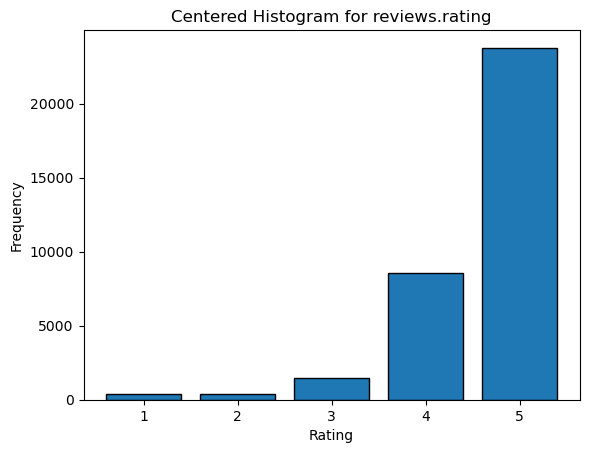

In [12]:
'''plt.hist( df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Histogram for reviews.rating' )
plt.show()'''
data = df['reviews.rating']

num_bins = 5  
bin_width = 1

bin_boundaries = np.arange(min(data) - bin_width/2, max(data) + bin_width/2 + 1, bin_width)
bin_centers = bin_boundaries[:-1] + bin_width / 2

plt.hist(data, bins=bin_boundaries, edgecolor='black', rwidth = 0.8)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Centered Histogram for reviews.rating')

plt.show()

In [13]:
product_counts = df[ 'asins' ].value_counts()

product_counts

B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
B018Y23MNM                1685
B018Y225IA                1038
B01BH83OOM                 636
B00IOY8XWQ                 580
B01J2G4VBG                 402
B00TSUGXKE                 372
B018SZT3BK                 270
B0189XYY0Q                 256
B00ZV9PXP2                 212
B01AHB9CYG                 158
B00QFQRELG                  73
B00VINDBJK                  67
B00IOYAM4I                  51
B01BFIBRIE                  30
B00QJDU3KY                  19
B002Y27P3M                  19
B01J4ORNHU                  16
B00QL1ZN3G                  15
B01AHB9C1E                  14
B006GWO5WK                  13
B00LW9XOJM                  13
B002Y27P6Y                  10
B018Y22BI4                  10
B006GWO5NE                   8
B00UH4D8G2                   8
B00X4WHP5E                   7
B018T075DC                   7
B018Y22C

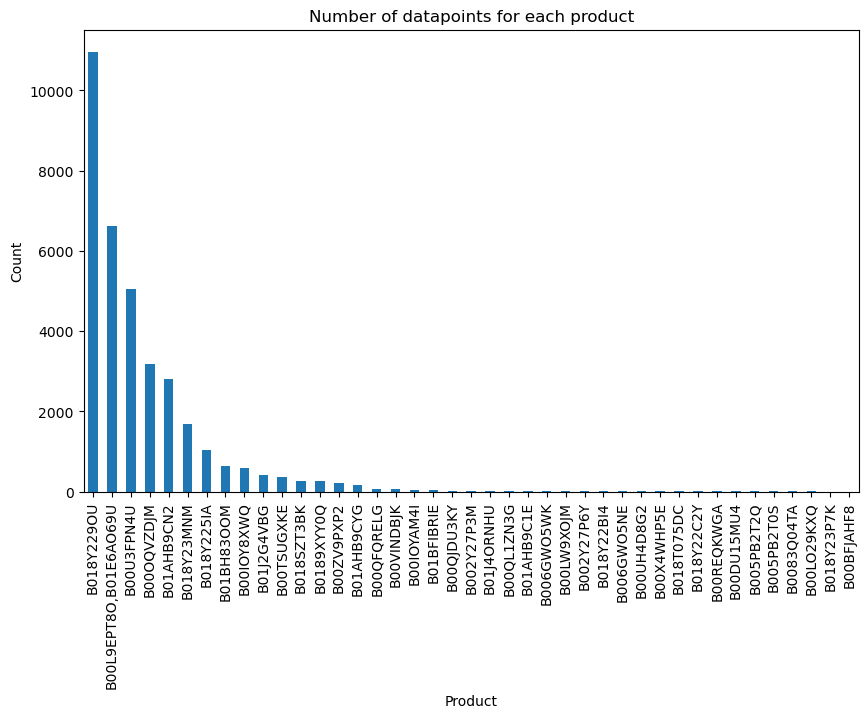

In [14]:
plt.figure( figsize = (10, 6) )
product_counts.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Number of datapoints for each product') 
plt.show()

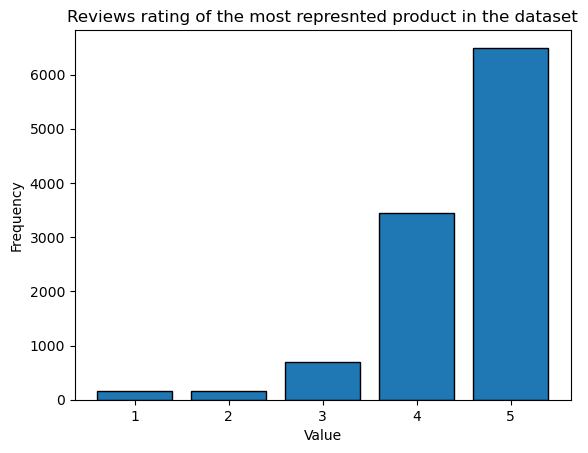

In [15]:
'''filtered_df = df[ df['asins'] == 'B018Y229OU' ]

plt.hist( filtered_df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )
plt.show()'''
filtered_df = df[ df['asins'] == 'B018Y229OU' ]

num_bins = 5  
bin_width = 1

bin_boundaries = np.arange(min(filtered_df['reviews.rating']) - bin_width/2, max(filtered_df['reviews.rating']) + bin_width/2 + 1, bin_width)
bin_centers = bin_boundaries[:-1] + bin_width / 2

plt.hist( filtered_df['reviews.rating'], bins=bin_boundaries, edgecolor='black', rwidth = 0.8)
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )

plt.show()

In [16]:
overall_grade = filtered_df['reviews.rating'].mean()
print( overall_grade )

4.454222141163597



**CLEANING THE DATASET: REMOVING PUNCTUATION FROM REVIEWS**


In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.text'] = df['reviews.text'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.text'][0])

This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease


In [19]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.title'] = df['reviews.title'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.title'][2])

Beginner tablet for our 9 year old son


In [20]:
df['length_review'] = df['reviews.text'].apply(len)

for i in df['length_review']:
    print(i)

141
74
125
584
606
206
110
129
260
54
51
83
139
61
51
77
59
159
61
307
109
160
81
219
166
90
84
163
49
96
48
92
63
143
60
100
61
70
53
57
403
72
68
121
55
111
128
65
51
132
123
102
410
54
106
88
67
423
54
57
230
86
83
73
111
98
76
143
86
49
85
82
65
67
86
212
79
168
57
63
88
104
387
474
74
310
84
327
403
935
87
55
773
47
53
143
55
300
130
125
146
75
75
242
46
74
66
52
57
64
82
484
160
121
291
228
144
97
76
70
46
168
82
72
95
176
1030
65
215
59
528
70
131
129
61
333
63
45
322
249
66
142
56
126
110
86
88
87
143
156
207
304
117
770
126
307
147
84
61
132
125
108
94
105
51
64
102
91
240
120
81
51
83
51
67
631
220
105
104
96
82
114
227
72
67
60
70
56
61
82
489
428
264
202
239
72
51
55
94
224
161
73
82
120
83
55
259
127
118
99
71
123
109
53
71
51
82
227
53
77
47
963
176
94
443
95
213
69
55
62
214
54
96
75
122
107
73
97
119
101
63
49
190
124
176
339
87
72
86
236
49
79
145
391
119
335
289
148
63
445
113
63
106
68
199
356
82
485
50
79
195
222
120
190
73
86
73
185
65
76
51
67
210
126
89
72
131
72

In [21]:
df['length_title'] = df['reviews.title'].apply(len)

for i in df['length_title']:
     print(i)

6
9
38
4
25
21
20
15
17
28
25
17
11
9
9
22
4
25
20
13
16
18
10
21
34
30
20
43
9
12
43
24
13
22
12
31
13
14
12
5
31
9
19
31
15
25
26
14
11
7
34
26
36
13
16
5
12
31
37
19
35
31
12
23
13
10
17
11
11
18
27
9
12
11
12
18
26
9
23
15
21
43
29
25
14
17
10
7
38
19
22
11
21
7
14
26
13
35
21
11
10
7
10
7
11
16
48
7
50
17
9
16
13
29
26
24
28
12
26
26
15
14
9
18
17
29
17
29
31
17
21
34
16
46
13
18
9
24
49
23
18
24
24
21
7
14
23
5
22
34
18
25
20
43
48
27
12
11
24
7
16
26
1
18
9
4
15
33
29
18
4
6
19
11
18
22
25
26
19
7
24
9
29
10
34
26
6
17
14
19
36
25
27
19
10
13
11
8
15
27
12
28
13
10
44
7
38
12
18
19
21
25
32
20
19
15
11
44
17
12
8
30
14
12
41
14
33
32
11
11
9
12
27
16
28
16
12
32
22
9
12
13
22
7
19
30
21
19
19
19
4
18
15
33
9
26
30
18
18
23
20
22
21
11
12
13
12
17
13
9
29
32
12
26
23
9
12
10
7
12
16
10
13
7
11
2
32
14
9
30
14
5
21
24
20
7
11
30
16
13
26
4
19
11
21
23
12
27
19
35
14
5
19
18
10
10
12
18
12
11
7
24
23
23
18
7
22
18
4
45
34
12
24
46
38
25
17
19
15
30
20
25
13
12
40
17
27
14
21
33
7
1

In [22]:
mean_length_review = df['length_review'].mean()
print( f'The mean length of reviews is: ', mean_length_review)
print('\n')
mean_length_title = df['length_title'].mean()
print( f'The mean length for titles is: ', mean_length_title)

The mean length of reviews is:  154.63537218695902


The mean length for titles is:  18.702769763416043


In [23]:
max_length_review = df['length_review'].max()
print( f'The max length of reviews is: ', max_length_review )
print( '\n' )
max_length_title = df['length_title'].max()
print( f'The max length of titles is: ', max_length_title )

The max length of reviews is:  10193


The max length of titles is:  191


In [24]:
def random_select(df, n, r, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column].isin(r)]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff


df_l = random_select(df, 500, np.arange(75, 201), 'length_review')
df_l.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,495.000000,500.000000,500.000000,500.000000
mean,0.139394,4.618000,123.082000,19.946000
std,0.681422,0.678968,35.476647,10.692977
min,0.000000,1.000000,75.000000,3.000000
25%,0.000000,4.000000,90.000000,12.000000
50%,0.000000,5.000000,118.000000,18.000000
75%,0.000000,5.000000,149.250000,25.000000
max,12.000000,5.000000,200.000000,83.000000


(0.0, 750.0)

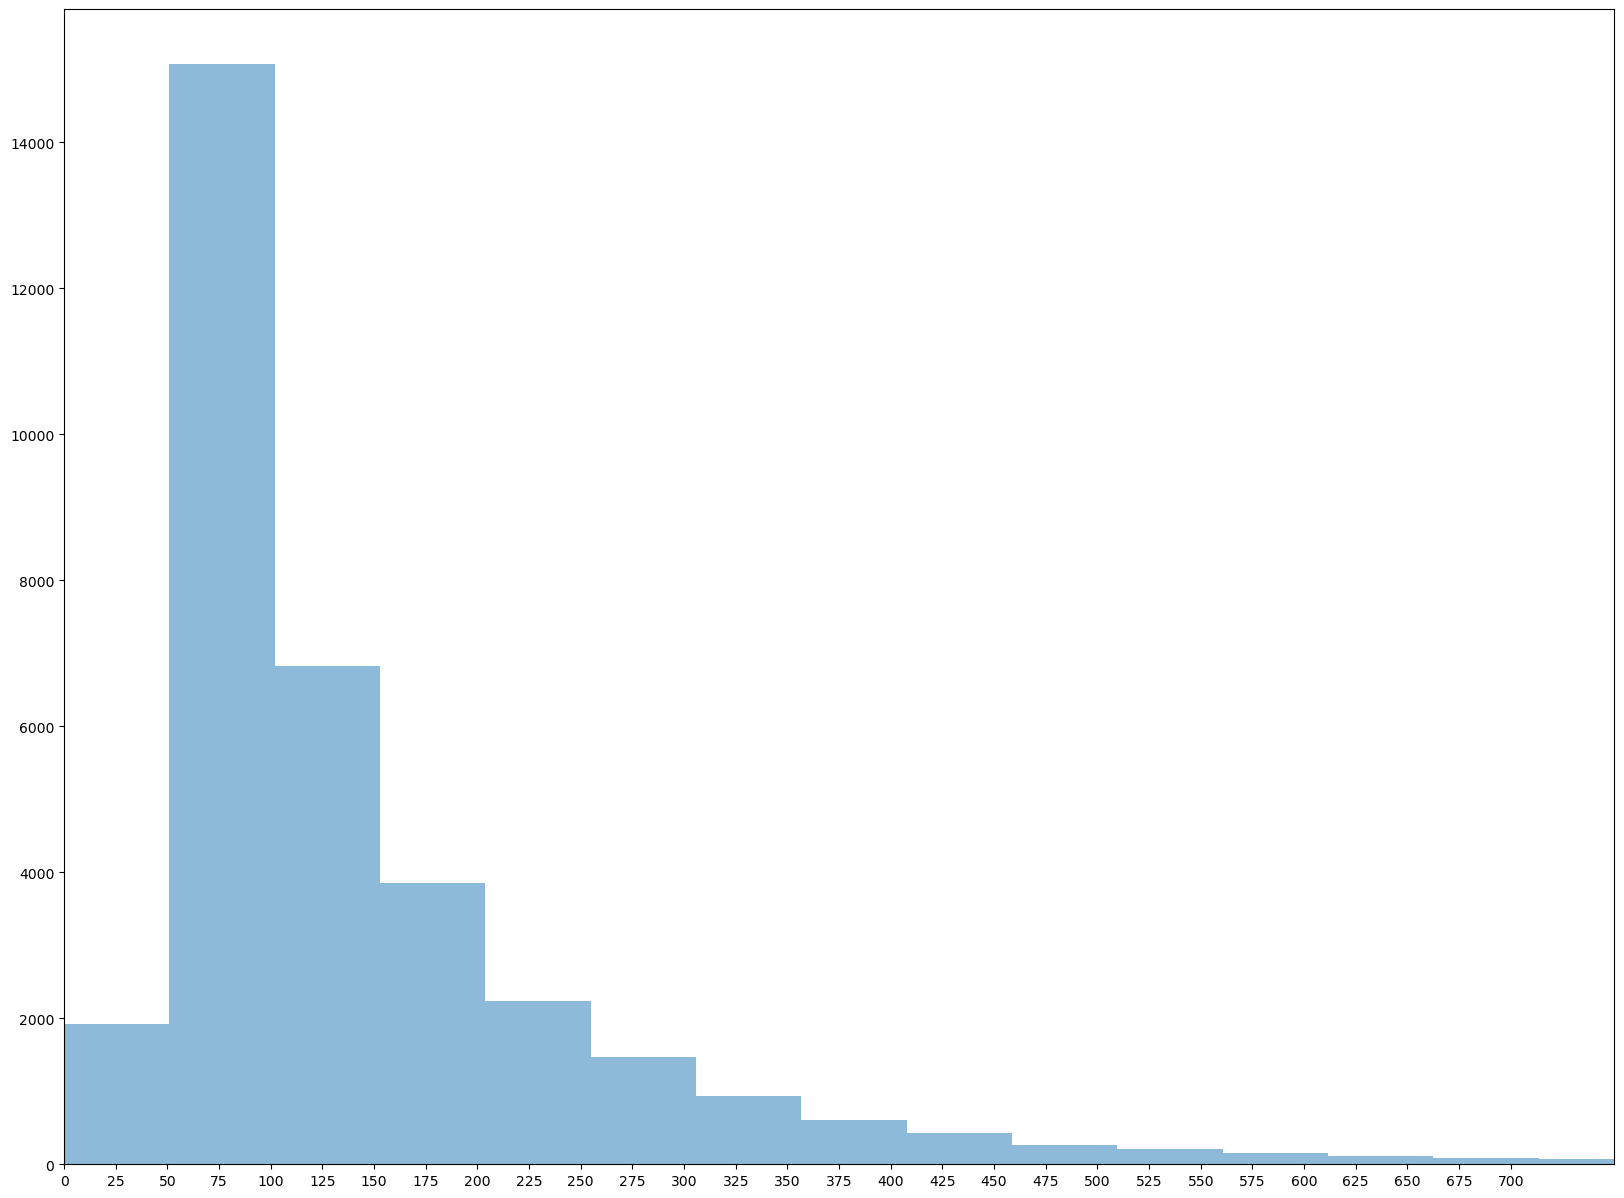

In [25]:
#bins = np.arange(0, 2000, 100 )
plt.figure(figsize = (20, 15))
ax1 = df.loc[df['reviews.rating'].isin([1, 2, 3, 4 ,5]), "length_review"].hist(bins=200, alpha = 0.5, label='Rating=1', grid = False) 
plt.xticks(np.arange(0, 701, step = 25))
#plt.yticks(np.arange(0, 5000, step = 100))
plt.xlim(0, 750)

In [26]:
df_new1 = random_select( df, 5000, np.arange(50, 100), 'length_review' ) 
df_new2 = random_select( df, 5000, np.arange(100, 150), 'length_review' ) 
df_new3 = df[df['length_review'] > 150]
df_new4 = df[df['length_review'] < 50 ]
df_new = pd.concat( [df_new1, df_new2, df_new3, df_new4 ], ignore_index = True )

(0.0, 750.0)

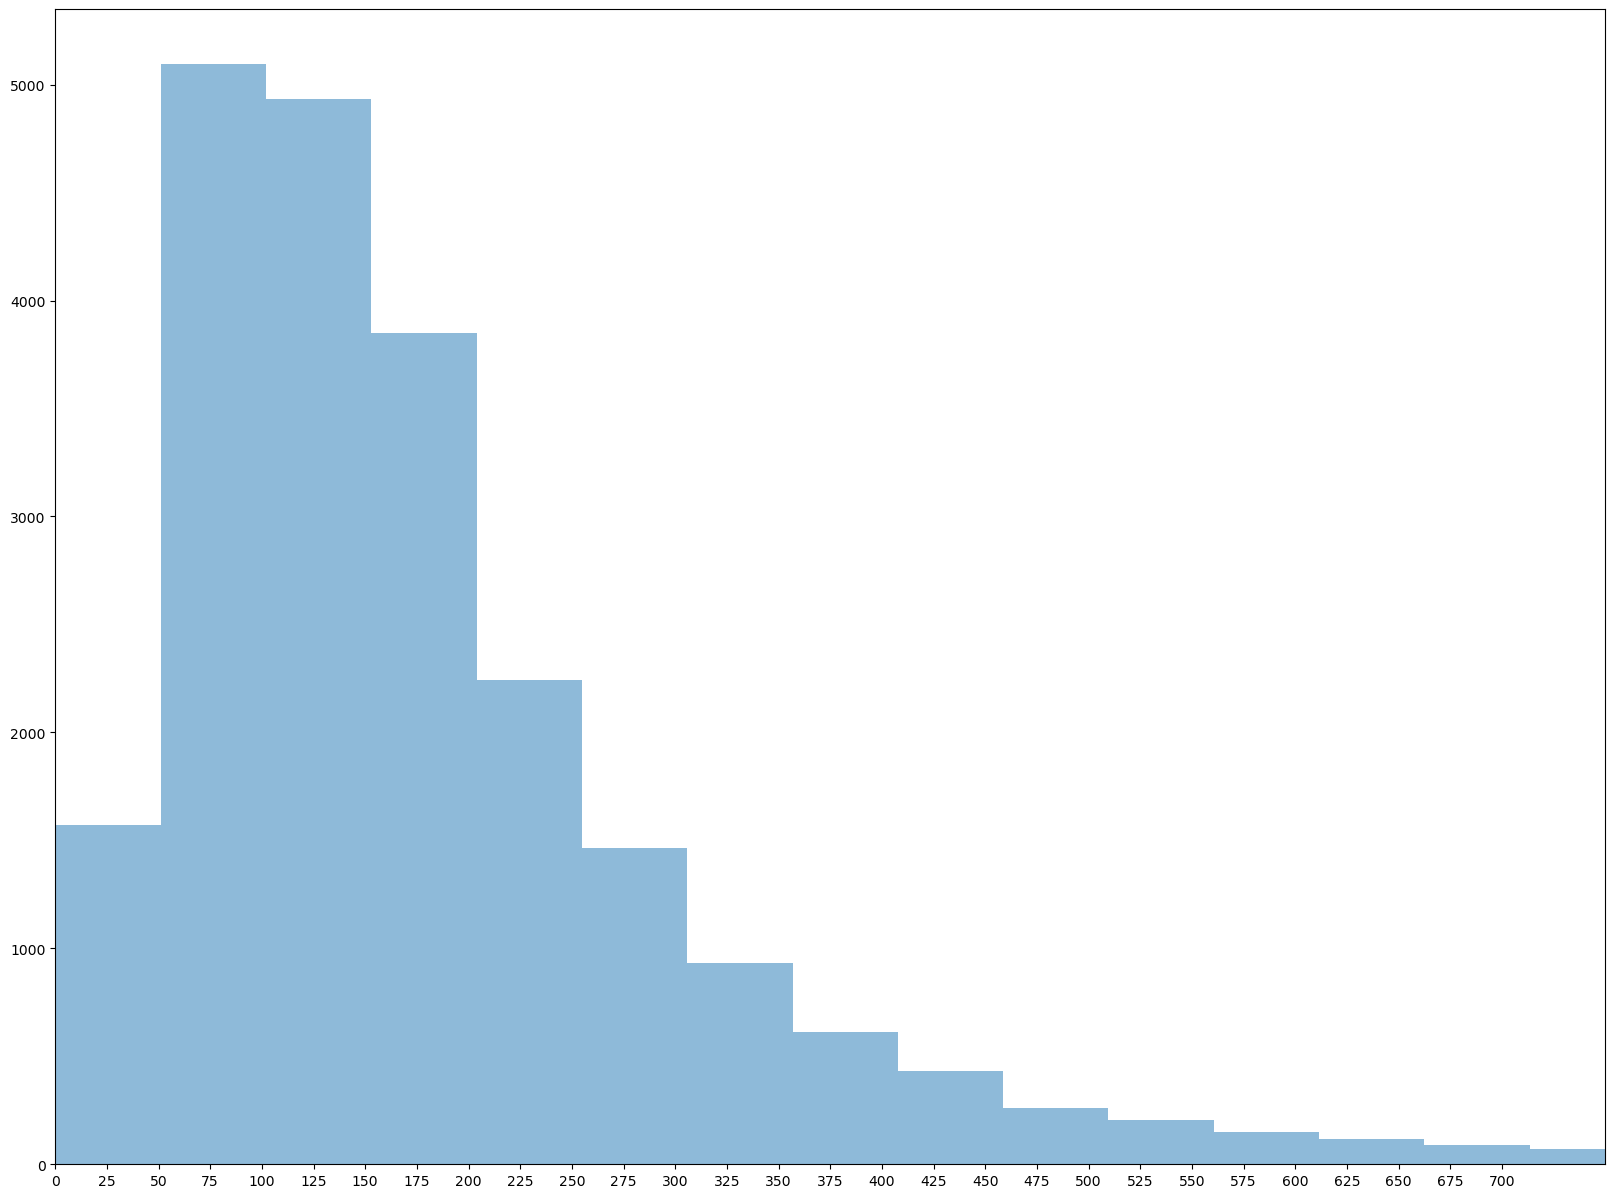

In [27]:
plt.figure(figsize = (20, 15))
ax1 = df_new.loc[df_new['reviews.rating'].isin([1, 2, 3, 4 ,5]), "length_review"].hist(bins=200, alpha = 0.5, label='Rating=1', grid = False) 
plt.xticks(np.arange(0, 701, step = 25))
#plt.yticks(np.arange(0, 5000, step = 100))
plt.xlim(0, 750)

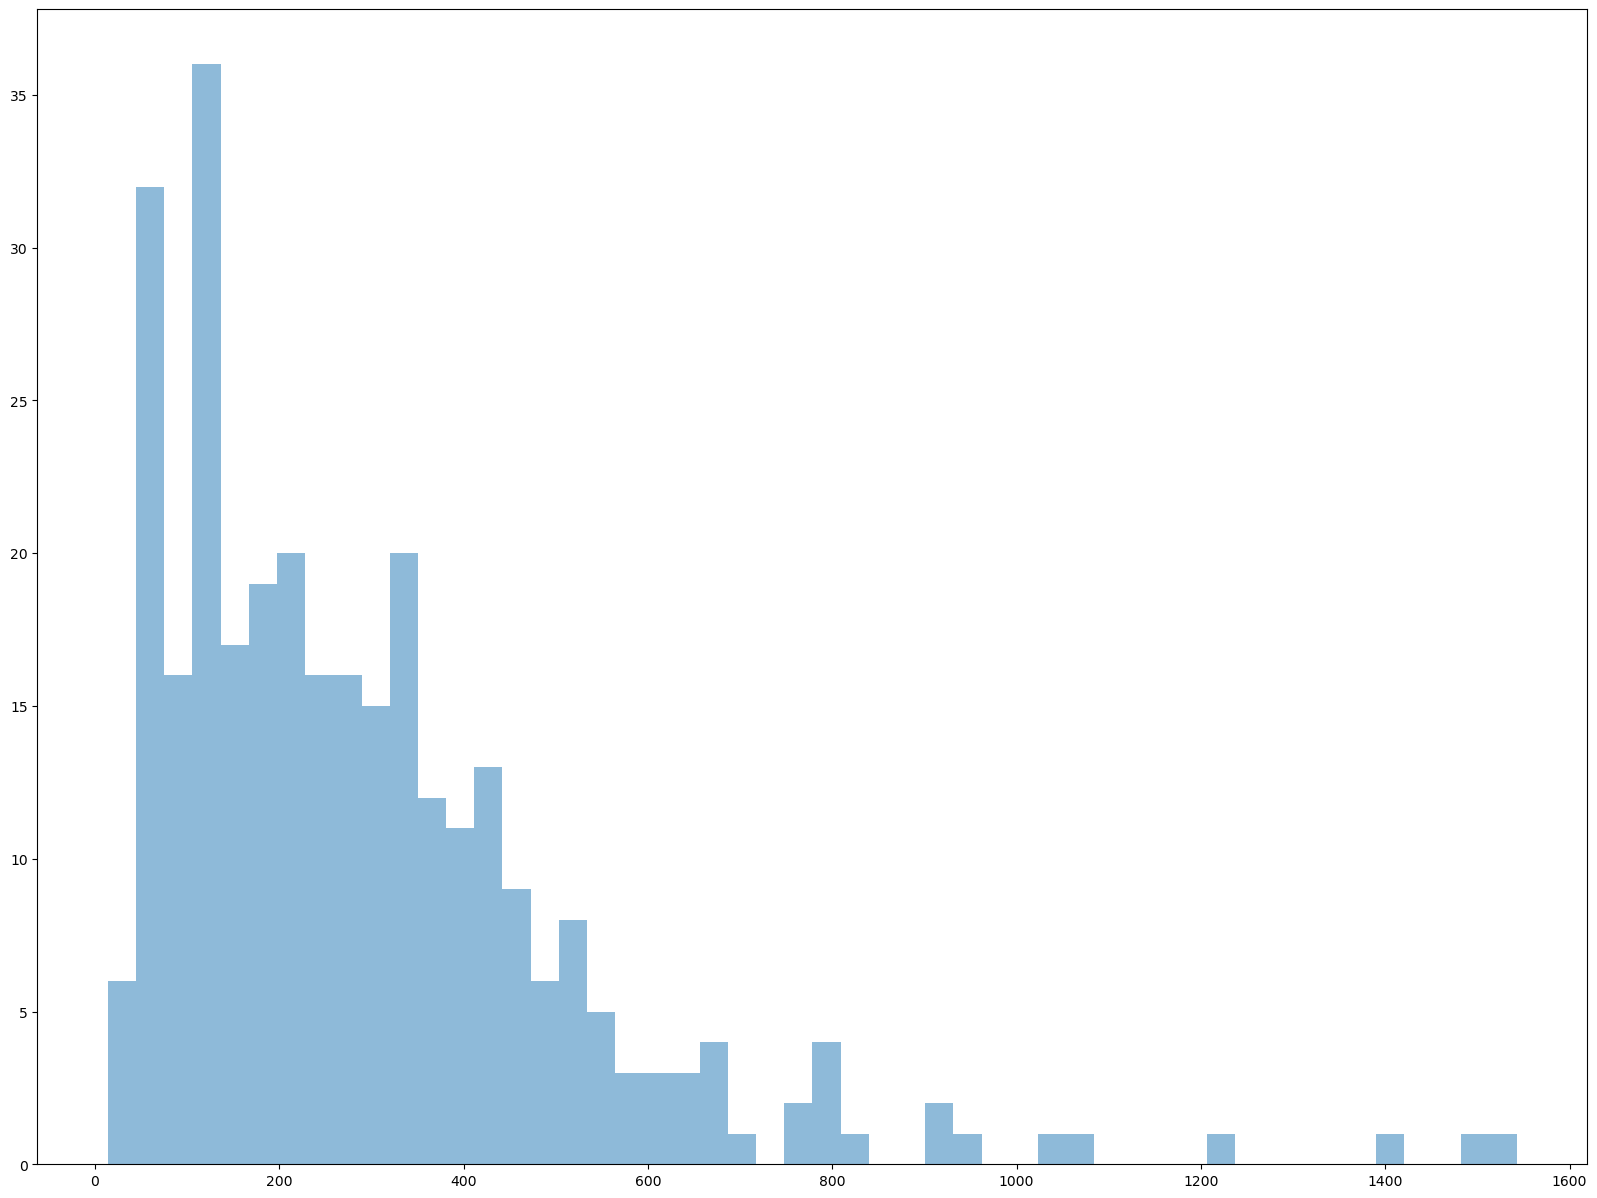

In [28]:
ax2 = df_new.loc[df_new['reviews.rating'] == 1, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

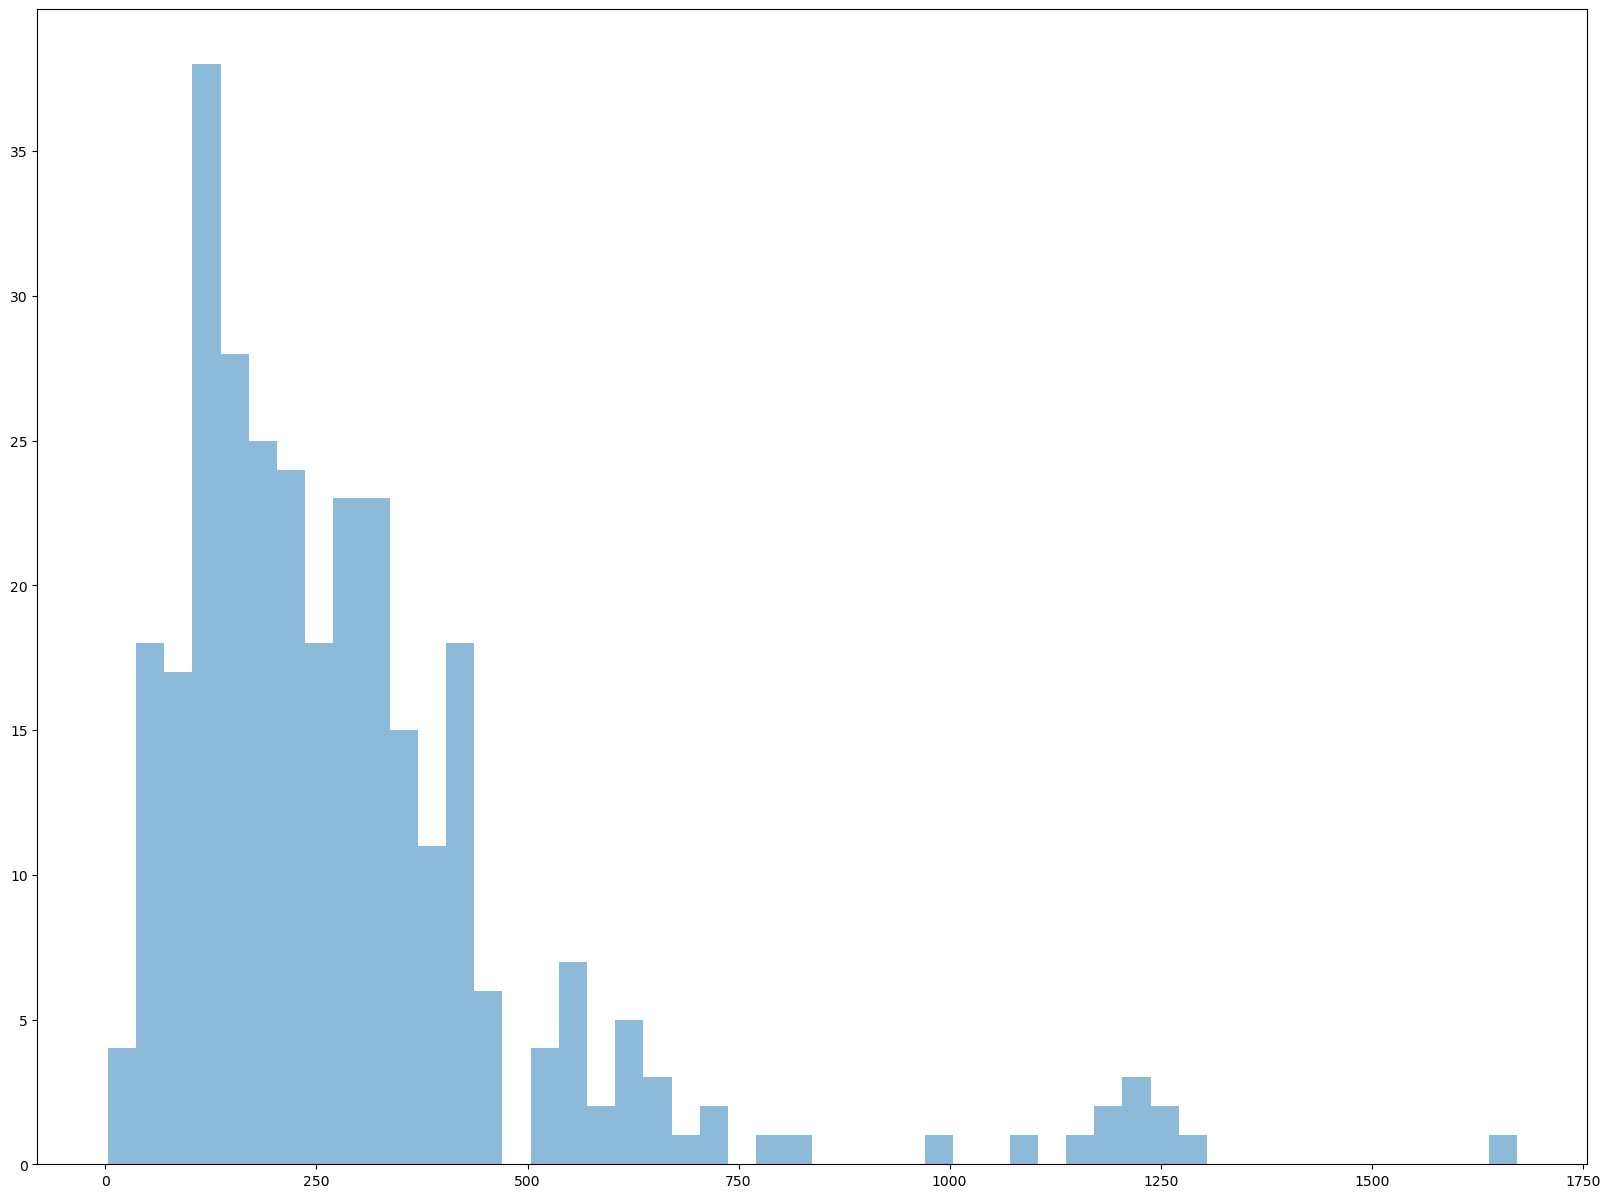

In [29]:
ax3 = df_new.loc[df_new['reviews.rating'] == 2, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

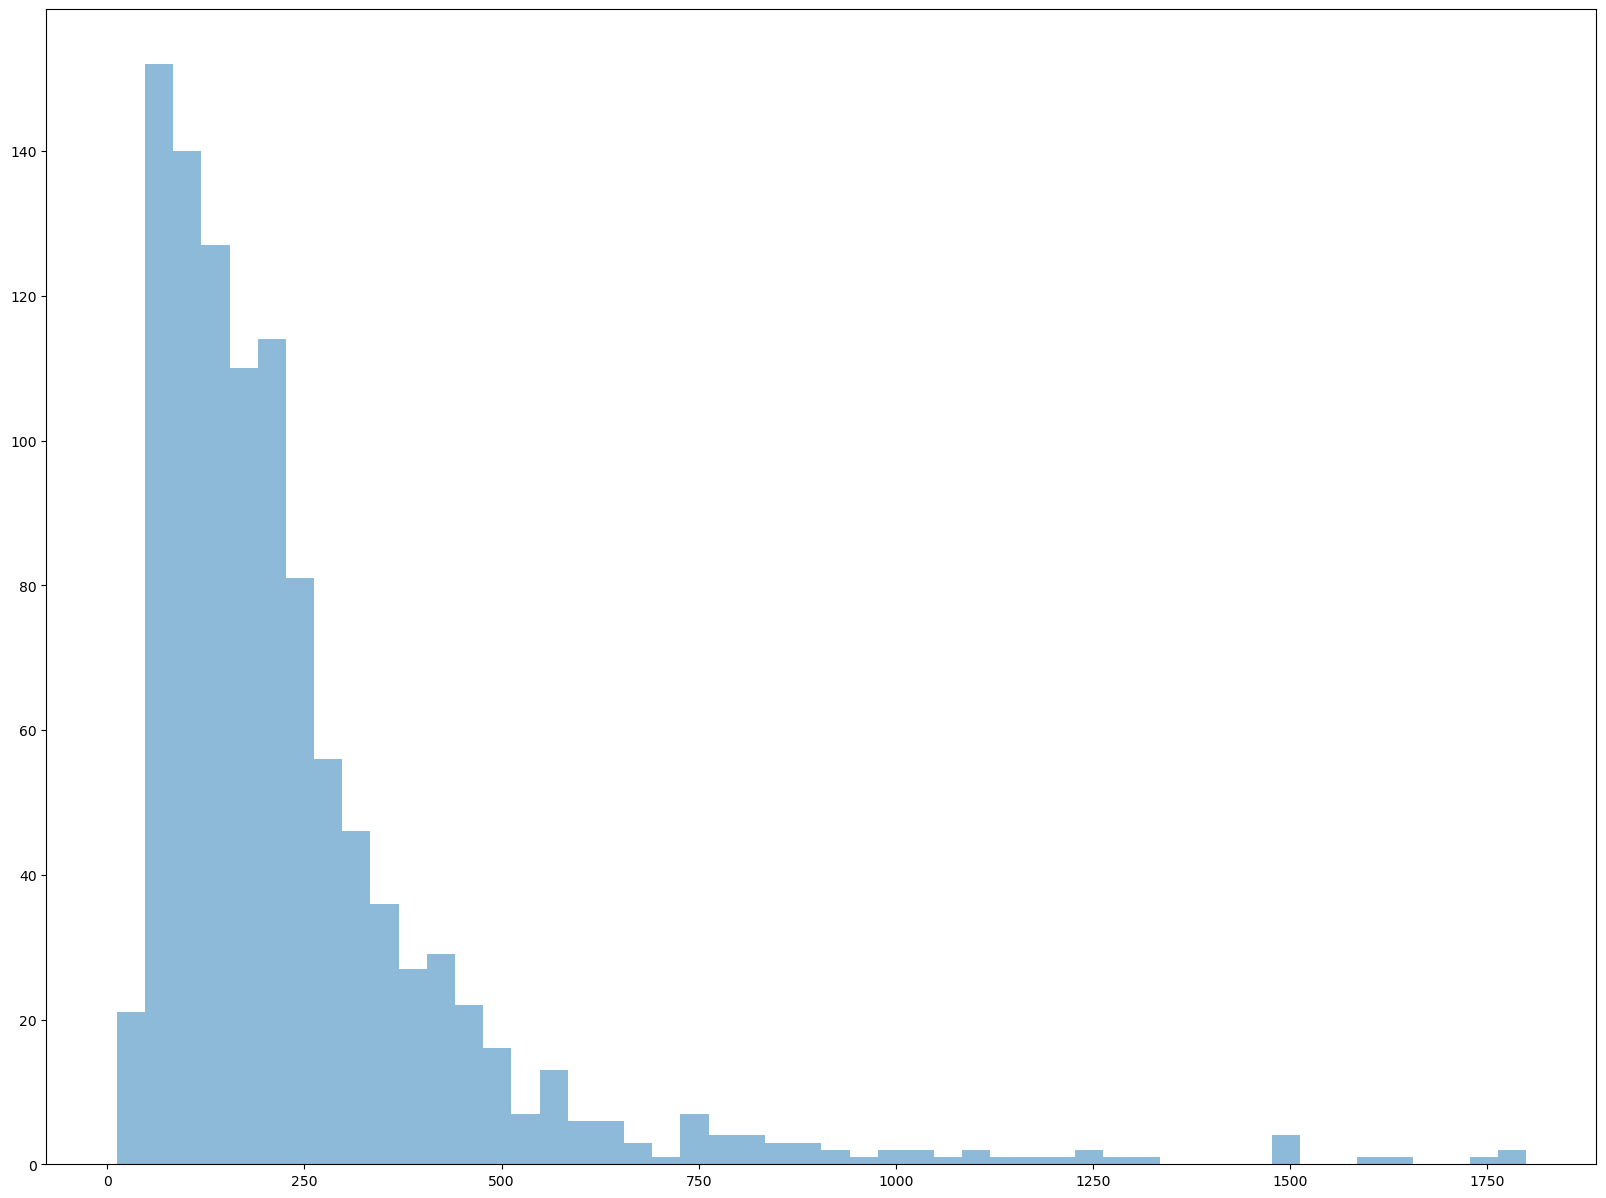

In [30]:
ax4 = df_new.loc[df_new['reviews.rating'] == 3, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

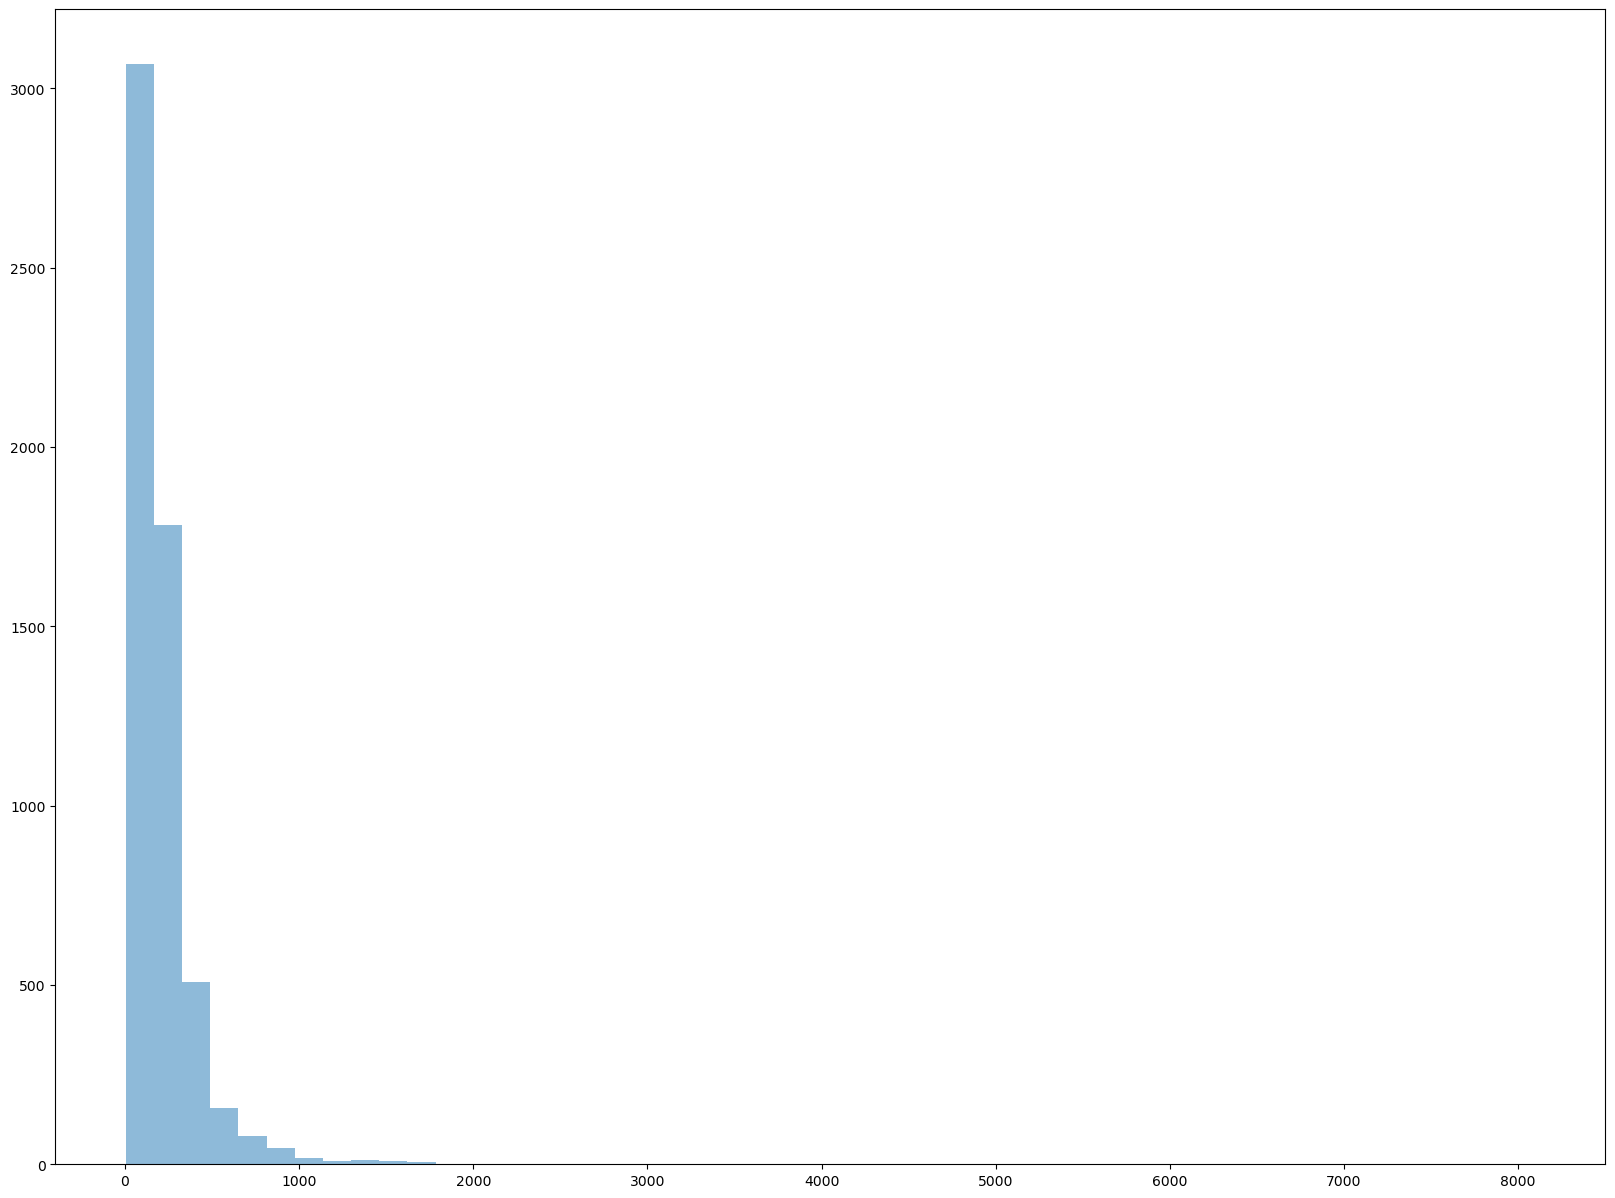

In [31]:
ax5 = df_new.loc[df_new['reviews.rating'] == 4, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

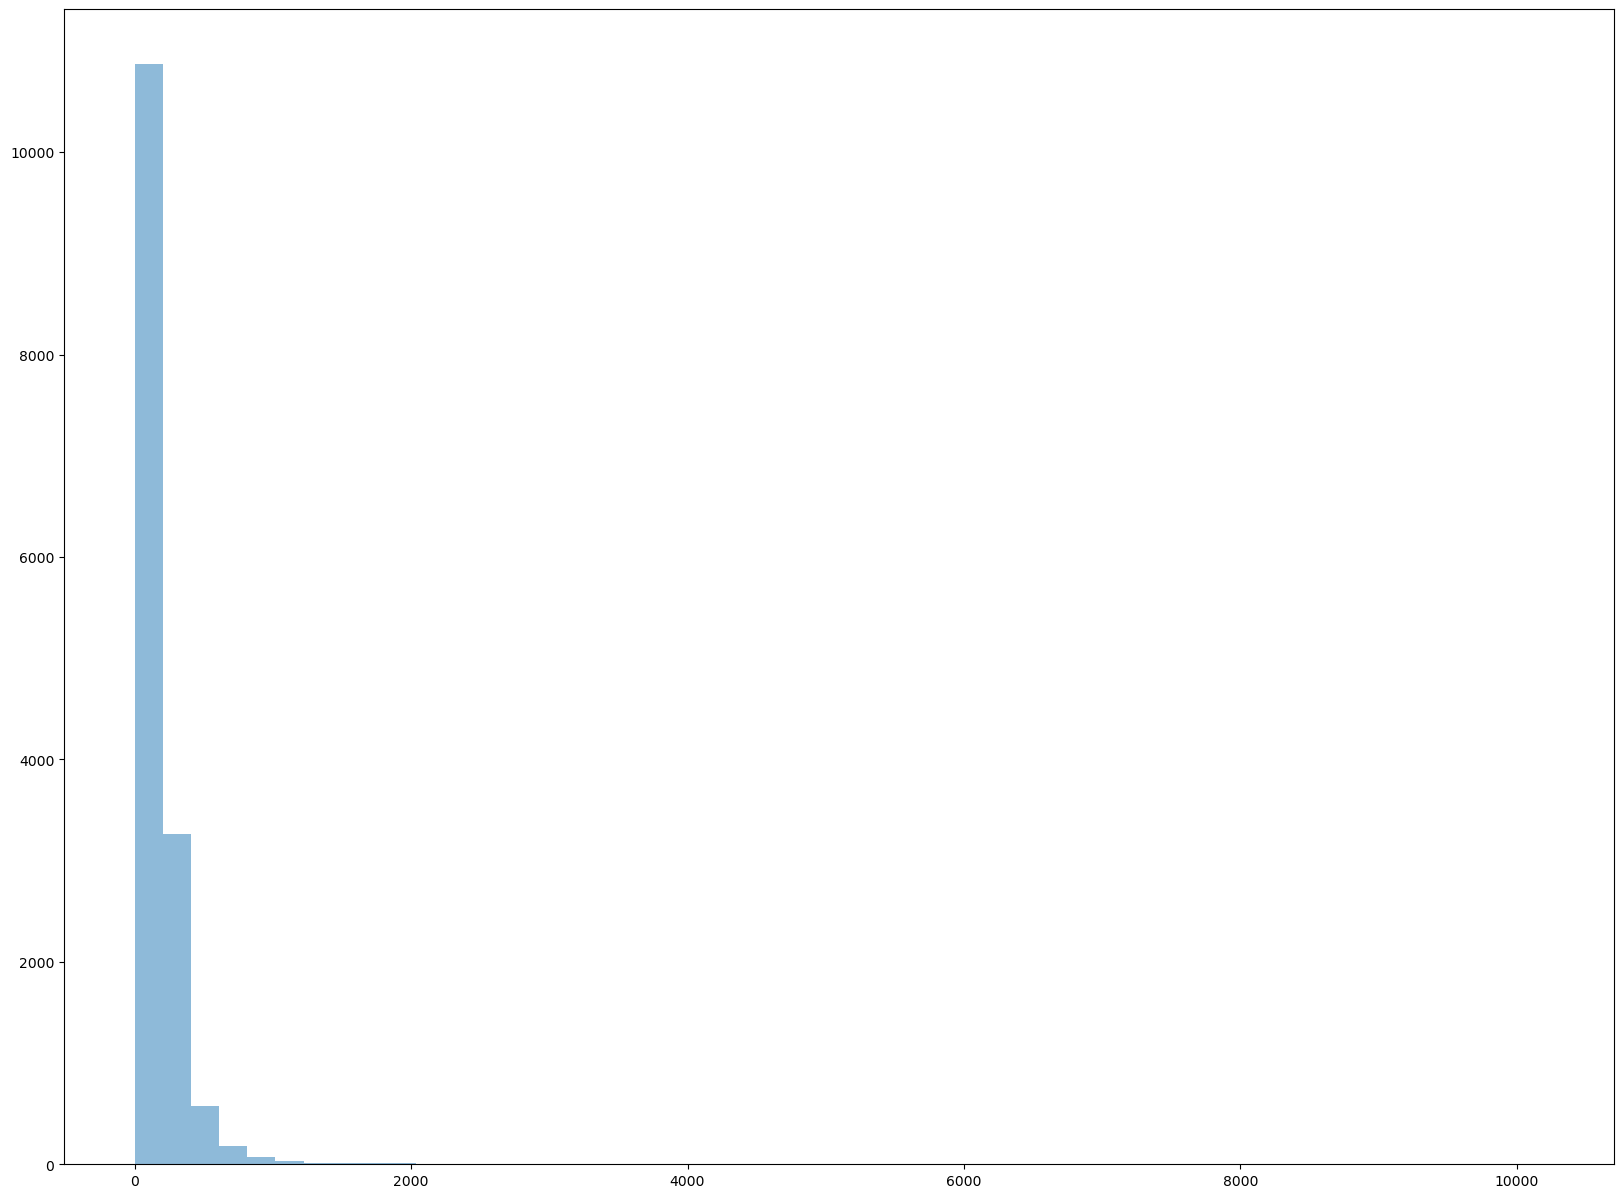

In [32]:
ax6 = df_new.loc[df_new['reviews.rating'] == 5, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

In [33]:
count = (df_new['length_review'] > 2000).sum()
count

23

In [34]:
df_new = df_new.drop( columns = [ 'id', 'name', 'keys', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs' ] )

In [35]:
df_new = df_new.drop( columns = [ 'reviews.dateAdded', 'reviews.username' ] )
df_new

,asins,brand,categories,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,length_review,length_title
0,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,5.0,ok i did like the product very much thank you ...,okkkkkk,52,7
1,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,True,0.0,5.0,Love this unit Helps me stay ahead of the game...,Works Well,70,10
2,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...",Amazon,True,0.0,5.0,This is the third Kindle I have purchased two...,Kindle,93,6
3,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,True,0.0,5.0,Great device for an extra set up in the house ...,Fantastic,80,9
4,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,True,0.0,5.0,I love asking Alexa questions and having her t...,Its great,71,9
...,...,...,...,...,...,...,...,...,...,...,...
22441,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,0.0,5.0,One of the best TV boxes on the market hands down,One of the best TV boxes on the market,49,38
22442,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,0.0,5.0,Works great for all your online streaming needs,Excellent,48,9
22443,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,1.0,5.0,Great,great,5,5
22444,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,0.0,5.0,its a great product to stream all your favorites,Great Product,48,13


Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

In [36]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(df_new, 1000, 3, 'reviews.rating')
df4 = random_select(df_new, 1000, 4, 'reviews.rating')
df5 = random_select(df_new, 1500, 5, 'reviews.rating')

In [37]:
df3.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,981.000000,1000.0,1000.000000,1000.000000
mean,1.690112,3.0,244.754000,20.492000
std,25.532168,0.0,229.494063,11.691819
min,0.000000,3.0,18.000000,2.000000
25%,0.000000,3.0,109.000000,12.000000
50%,0.000000,3.0,186.000000,19.000000
75%,0.000000,3.0,295.000000,27.000000
max,730.000000,3.0,1799.000000,119.000000


In [38]:
df4.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,990.000000,1000.0,1000.000000,1000.000000
mean,0.948485,4.0,203.575000,20.838000
std,12.152901,0.0,184.195837,10.019089
min,0.000000,4.0,6.000000,3.000000
25%,0.000000,4.0,87.750000,13.000000
50%,0.000000,4.0,152.000000,19.000000
75%,0.000000,4.0,254.000000,27.000000
max,271.000000,4.0,1966.000000,50.000000


In [39]:
df5.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,1477.000000,1500.0,1500.000000,1500.000000
mean,0.367637,5.0,180.382000,19.086667
std,2.991788,0.0,174.608798,11.189100
min,0.000000,5.0,4.000000,3.000000
25%,0.000000,5.0,83.000000,12.000000
50%,0.000000,5.0,137.000000,17.000000
75%,0.000000,5.0,215.000000,25.000000
max,63.000000,5.0,2567.000000,191.000000


In [40]:
df12 = df_new[df_new['reviews.rating'].isin([1, 2])]

In [41]:
df12.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,575.000000,613.000000,613.000000,613.000000
mean,6.205217,1.499184,295.672104,21.946166
std,32.686180,0.500408,241.109605,13.357651
min,0.000000,1.000000,3.000000,2.000000
25%,0.000000,1.000000,131.000000,12.000000
50%,0.000000,1.000000,240.000000,20.000000
75%,1.000000,2.000000,375.000000,30.000000
max,422.000000,2.000000,1672.000000,109.000000


In [42]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,4023.000000,4113.000000,4113.000000,4113.000000
mean,1.667412,3.748845,218.854607,20.280331
std,18.831049,1.230644,206.019892,11.437359
min,0.000000,1.000000,3.000000,2.000000
25%,0.000000,3.000000,99.000000,12.000000
50%,0.000000,4.000000,161.000000,18.000000
75%,0.000000,5.000000,269.000000,26.000000
max,730.000000,5.000000,2567.000000,191.000000


In [43]:
def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)


In [44]:
amazon = amazon[[ 'reviews.text', 'reviews.rating', 'length_review', 'label']]
amazon.describe()

,reviews.rating,length_review,label
count,4113.000000,4113.000000,4113.000000
mean,3.748845,218.854607,0.607829
std,1.230644,206.019892,0.488294
min,1.000000,3.000000,0.000000
25%,3.000000,99.000000,0.000000
50%,4.000000,161.000000,1.000000
75%,5.000000,269.000000,1.000000
max,5.000000,2567.000000,1.000000


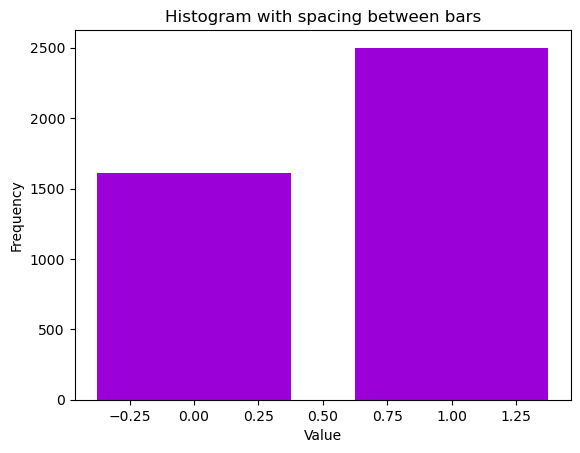

In [45]:
data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

In [46]:
good = amazon[amazon['label'] == 1]
bad = amazon[amazon['label'] == 0]

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]

g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g
goods

['Echo sounds better for music but Tap gives me portability Good to have both Now Tap is voice activated so its all good',
 'Its just enough for my 3 yr old Enough storage space Easy to navigate through',
 'Our household is an Apple household 3 iPads 4 iPhones Mac Apple TV etc but for the price of these tablets I gave this a try I had low expectations due to the price point and didnt expect much as far as screen resolution etcSet up was easy linked with my Amazon Prime account easily as wellscreen resolution doesnt compare to iPad Retina display but thats expectedbattery life is ok but not on par with iPadI use it for Ebooks as its smaller than my iPads and for checking Facebook etc if its nearbyIt cant replace iPad BUTI bought 4 of them so everyone in my house has this small functional tabletMight even permanently mount as small TV screens in bathroom etc',
 'Its a very nice product to purchase They give you 1 year of free stuff from amazon You can download all kinds of apps Great tab

In [49]:
bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]

b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b
bads

['If you actually paid 20 for this adapter youre out of your mind',
 'Screen was cracked but the package did arrive earlier than expected',
 'Cumbersome complicated and not kid friendly went with Apple suggesting you do too',
 'Bad performance Slow device Not worth buying Better products are available in this range',
 'go for a google if you want proper answers to any of your questions',
 'I thought Id love this but felt like it had very little purpose Did like it at all',
 'Returned it in 2 days Digital assistants have a long way to go',
 'Sadly no having netflix support is resulting in my last tablet purchase from Amazon',
 'Dont like the fact you have to have Amazon prime to use it',
 'Super Slow Would not download Returned after a week',
 'It was ancient technology and did not keep up with the internet',
 'I returned the item was not what I expected very disappointed white the table',
 'I didont care for this tablet downloading apps outside of Amazon was really confusing',
 'Sold i

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
g = []
for s in goods:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g.append(s)

goods = g

In [52]:
b = []
for s in bads:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    b.append(s)

bads = b

In [53]:
def data_cleaning(text):

    Test_punc_removed = [char for char in text if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean    

In [54]:
y = amazon['label']

In [55]:
X = pd.DataFrame( amazon['length_review'].values )

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [57]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

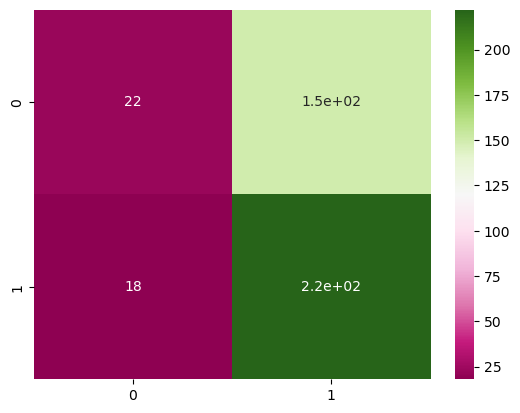

In [59]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.55      0.13      0.21       172
           1       0.60      0.93      0.73       240

    accuracy                           0.59       412
   macro avg       0.57      0.53      0.47       412
weighted avg       0.58      0.59      0.51       412



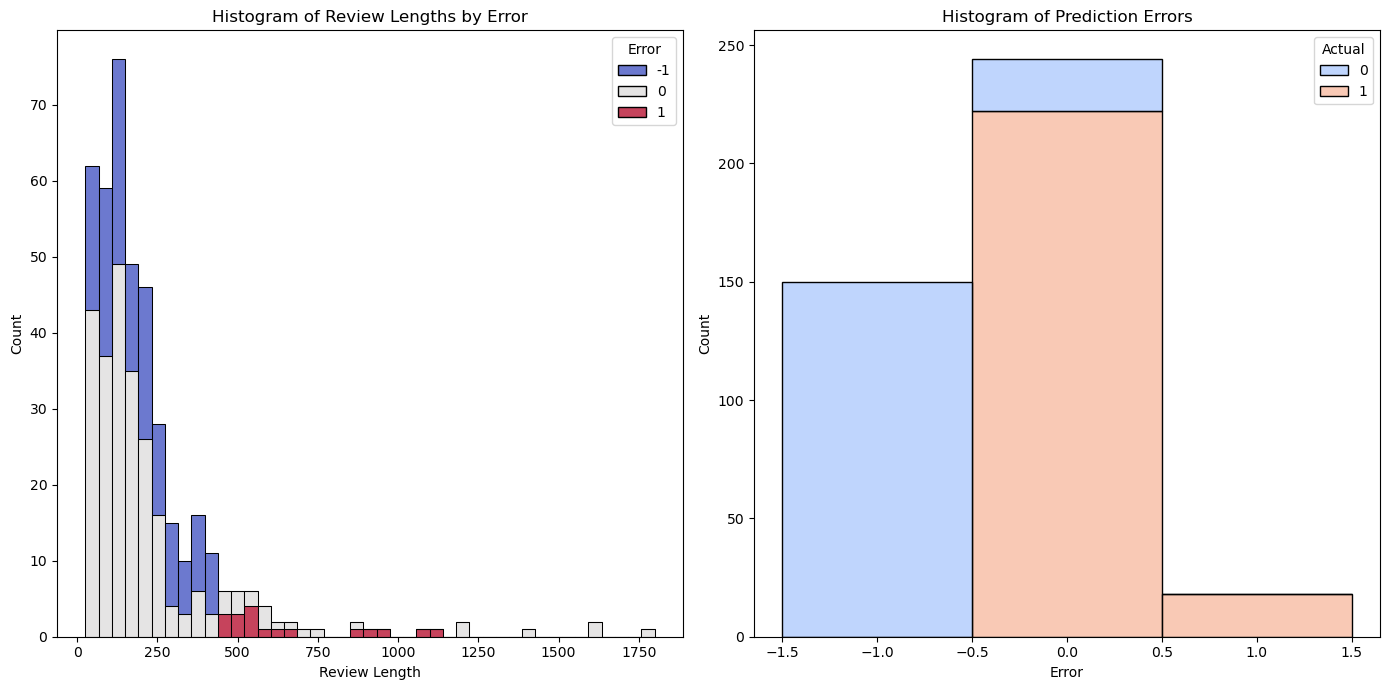

Correlation between Review Length and Error:
               Review_Length     Error
Review_Length       1.000000  0.244085
Error               0.244085  1.000000


In [61]:
errors = y_test - y_predict_test
results = pd.DataFrame({
    'Review_Length': X_test.values.ravel(),
    'Actual': y_test,
    'Predicted': y_predict_test,
    'Error': errors
})

# Plot histograms
plt.figure(figsize=(14, 7))

# Histogram of review lengths with errors
plt.subplot(1, 2, 1)
sns.histplot(data=results, x='Review_Length', hue='Error', multiple='stack', palette='coolwarm')
plt.title('Histogram of Review Lengths by Error')
plt.xlabel('Review Length')
plt.ylabel('Count')

# Histogram of prediction errors
#results['Actual'] = results['Actual'].astype('category')
plt.subplot(1, 2, 2)
sns.histplot(data=results, x='Error', hue='Actual', multiple='stack', palette='coolwarm', bins = np.arange( -1.5, 2.5, 1))
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation between review length and error
correlation = results[['Review_Length', 'Error']].corr()
print("Correlation between Review Length and Error:")
print(correlation)

              precision    recall  f1-score   support

           0       0.56      0.12      0.19       172
           1       0.60      0.93      0.73       240

    accuracy                           0.59       412
   macro avg       0.58      0.52      0.46       412
weighted avg       0.58      0.59      0.50       412



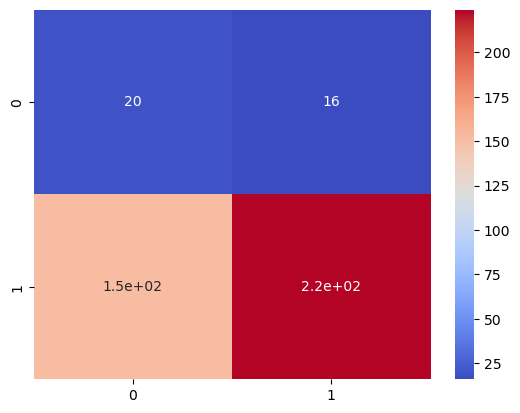

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))